In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import uproot
import random
import numba
import gc

In [2]:
#opens and setups the  MC results
DY_tree = uproot.open('rootfiles_MC/DY_072424_All/merged_trackQA.root:QA_ana')

detID = DY_tree["detectorID"].arrays(library="np")["detectorID"]

elemID = DY_tree["elementID"].arrays(library="np")["elementID"]

drift = DY_tree["driftDistance"].arrays(library="np")["driftDistance"]

gpx = DY_tree["gpx"].arrays(library="np")["gpx"]
gpy = DY_tree["gpy"].arrays(library="np")["gpy"]
gpz = DY_tree["gpz"].arrays(library="np")["gpz"]

gvx = DY_tree["gvx"].arrays(library="np")["gvx"]
gvy = DY_tree["gvy"].arrays(library="np")["gvy"]
gvz = DY_tree["gvz"].arrays(library="np")["gvz"]

In [5]:
print(np.shape(gvx))

(1318658,)


In [3]:
#clean data
bad_event = []
for i in range(len(gpx)):
    if(len(gpx[i]) != 2):
        bad_event = np.append(bad_event,i)


bad_event = bad_event.astype(int)


# detID = np.delete(detID, bad_event)
# detID = np.reshape(detID,(-1,500))
# elemID = np.delete(elemID, bad_event)
# elemID = np.reshape(elemID,(-1,500))

# gpx = np.delete(gpx, bad_event)
# gpy = np.delete(gpy, bad_event)
# gpz = np.delete(gpz, bad_event)

# gpx = np.reshape(gpx,(-1,2))
# gpy = np.reshape(gpy,(-1,2))
# gpz = np.reshape(gpz,(-1,2))

# gvx = np.delete(gvx, bad_event)
# gvy = np.delete(gvy, bad_event)
# gvz = np.delete(gvz, bad_event)

# gvx = np.reshape(gvx,(-1,2))
# gvy = np.reshape(gvy,(-1,2))
# gvz = np.reshape(gvz,(-1,2))



array([   2105,    3384,    8708,   11166,   12094,   13970,   18972,
         21748,   25234,   27097,   28935,   30673,   31627,   32918,
         33586,   34668,   37211,   37268,   37751,   38856,   39054,
         39154,   43166,   43722,   47402,   50981,   52195,   55705,
         58848,   59467,   59621,   59652,   61070,   63995,   64300,
         69878,   70268,   70586,   71208,   74056,   74724,   75168,
         76711,   77391,   80108,   80391,   80484,   82596,   84711,
         90512,   92120,   93863,   94479,   97536,   98391,   99128,
        102555,  107197,  110608,  117593,  122268,  123803,  123919,
        133407,  136851,  137828,  141759,  146946,  147166,  148021,
        151176,  153669,  155946,  156179,  156559,  159124,  159862,
        162243,  166184,  167357,  172142,  175799,  182039,  183040,
        185456,  188736,  189070,  189126,  197130,  198685,  206399,
        206734,  208134,  213152,  213613,  216918,  218710,  221596,
        224420,  226

In [5]:
len(detID)

1318658

In [4]:
@numba.jit(nopython=True)
def clean(events):
    for j in range(len(events)):
            for i in range(500):
                if(events[j][i]>1000):
                    events[j][i]=0
    return events

#Clean input data
elemID=clean(elemID)
detID=clean(detID)

In [8]:
len(detID)

1318658

(0.0, 200.0)

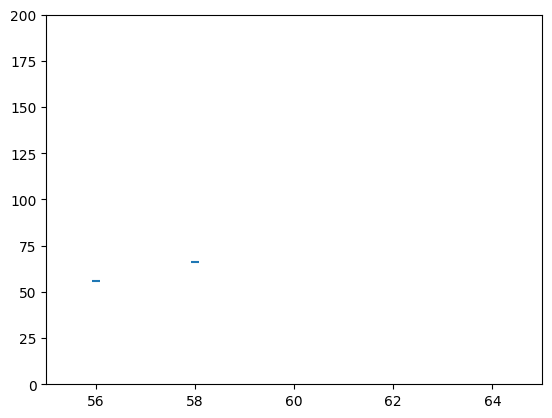

In [5]:
#match drift with detid. Match detid with elementid.padd drift with zeros where prop and hodo are. 
plt.scatter(detID[0],elemID[0],marker='_')
plt.xlim(55,65)
plt.ylim(0,200)

In [5]:
#target = 0, Dump = 1, Gap = 2, All = 3



number_of_events = 5000
source_mup = np.ones(number_of_events)*3
source_mum =np.ones(number_of_events)*-3
source = np.vstack((source_mup,source_mum)).T

hit_matrix = np.zeros((number_of_events,65,201))

truth_values = np.zeros((number_of_events,7,201))

for i in range(number_of_events):
    event = i
    DC_hit = 0
    
    element_ID = []
    detector_ID = []
    drift_distance = []
    if(np.shape(np.where(bad_event == event)) != 0):
        for j in range(1,64):
            index = np.where(detID[event] == j)            
            if(np.size(index) != 0):
                #print(detID[event][index][0])
                for k in range(len(index[0])):     
                    hit = elemID[event][index[0][k]]
                    if(j <= 30):
                        if(DC_hit < len(drift[event])):          
                            hit_matrix[i,j,hit] = drift[event][DC_hit]
                            print(event,DC_hit,k,i)

                            DC_hit += 1
                    else:
                        hit_matrix[i,j,hit] = 1
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    # detector_ID = np.append(detector_ID,detID[event][index[0][k]])
                    # element_ID = np.append(element_ID, elemID[event][index[0][k]])
                    # if(j <= 30):
                    #     if(DC_hit < len(drift[event])):
                    #         drift_distance = np.append(drift_distance,drift[event][DC_hit])
                    #         DC_hit += 1
                    # else:
                    #     drift_distance = np.append(drift_distance,0)

    # pad_num = 500 - len(detector_ID)
    # #print(len(detector_ID))
    # element_ID = np.pad(element_ID,(0,pad_num))
    # detector_ID = np.pad(detector_ID,(0,pad_num))
    # drift_distance = np.pad(drift_distance,(0,pad_num))

    # hit_matrix[i][0]=detector_ID
    # hit_matrix[i][1]=element_ID
    # hit_matrix[i][2]=drift_distance


0 0 0 0
0 1 0 0
0 2 0 0
0 3 0 0
0 4 0 0
0 5 0 0
0 6 0 0
0 7 0 0
0 8 0 0
0 9 0 0
0 10 0 0
0 11 0 0
0 12 0 0
0 13 0 0
0 14 0 0
0 15 0 0
0 16 0 0
0 17 0 0
1 0 0 1
1 1 1 1
1 2 0 1
1 3 1 1
1 4 0 1
1 5 1 1
1 6 0 1
1 7 1 1
1 8 0 1
1 9 0 1
1 10 0 1
1 11 0 1
1 12 0 1
1 13 0 1
1 14 0 1
1 15 0 1
1 16 0 1
1 17 0 1
1 18 0 1
1 19 0 1
1 20 0 1
1 21 0 1
2 0 0 2
2 1 0 2
2 2 0 2
2 3 0 2
2 4 0 2
2 5 0 2
2 6 0 2
2 7 0 2
2 8 0 2
2 9 0 2
2 10 0 2
2 11 0 2
2 12 0 2
2 13 0 2
2 14 0 2
2 15 0 2
2 16 0 2
2 17 0 2
3 0 0 3
3 1 1 3
3 2 0 3
3 3 1 3
3 4 0 3
3 5 1 3
3 6 0 3
3 7 1 3
3 8 0 3
3 9 1 3
3 10 0 3
3 11 1 3
3 12 0 3
3 13 1 3
3 14 0 3
3 15 1 3
3 16 0 3
3 17 1 3
3 18 0 3
3 19 1 3
3 20 0 3
3 21 1 3
3 22 0 3
3 23 1 3
3 24 0 3
3 25 0 3
3 26 0 3
3 27 0 3
3 28 0 3
3 29 0 3
4 0 0 4
4 1 0 4
4 2 0 4
4 3 0 4
4 4 0 4
4 5 0 4
4 6 0 4
4 7 0 4
4 8 0 4
4 9 0 4
4 10 0 4
4 11 0 4
4 12 0 4
4 13 0 4
4 14 0 4
4 15 0 4
4 16 0 4
4 17 0 4
5 0 0 5
5 1 0 5
5 2 0 5
5 3 0 5
5 4 0 5
5 5 0 5
5 6 0 5
5 7 0 5
5 8 0 5
5 9 0 5
5 10 0 5
5 11 0 

In [6]:
truth_values = np.zeros((number_of_events,7,201))

number_of_tracks = 2
for i in range(number_of_events):
    event = i
    for j in range(number_of_tracks):
        if(np.shape(np.where(bad_event == event)) != 0):
            truth_values[i,0,j] = gpx[i][j]
            truth_values[i,1,j] = gpy[i][j]
            truth_values[i,2,j] = gpz[i][j]

            truth_values[i,3,j] = gvx[i][j]
            truth_values[i,4,j] = gvy[i][j]
            truth_values[i,5,j] = gvz[i][j]

            truth_values[i,6,j] = source[i][j]

In [7]:
np.savez('DY_All_5000.npz', array1=hit_matrix, array2=truth_values)

In [42]:
np.where(detID[0][0] == 1-1) 

(array([], dtype=int64),)

In [8]:
np.shape(hit_matrix)

(5000, 65, 201)

In [10]:
hit_matrix[0][1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
np.shape(truth_values)

(5000, 7, 201)

In [12]:
truth_values[0][:]

array([[  -2.06844211,    0.74119735,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   2.42650938,   -1.38331139,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  42.16530228,   20.32130814,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  -0.363377  ,   -0.363377  ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-303.03164673, -303.03164673,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   3.        ,   -3.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [10]:
len(hit_matrix)

1

In [62]:
gpx[3384]

array([-0.4898112 , -0.49072438, -1.0430704 ,  1.2002186 ], dtype=float32)

In [64]:
np.where(count != 2)

(array([   2105,    3384,    8708,   11166,   12094,   13970,   18972,
          21748,   25234,   27097,   28935,   30673,   31627,   32918,
          33586,   34668,   37211,   37268,   37751,   38856,   39054,
          39154,   43166,   43722,   47402,   50981,   52195,   55705,
          58848,   59467,   59621,   59652,   61070,   63995,   64300,
          69878,   70268,   70586,   71208,   74056,   74724,   75168,
          76711,   77391,   80108,   80391,   80484,   82596,   84711,
          90512,   92120,   93863,   94479,   97536,   98391,   99128,
         102555,  107197,  110608,  117593,  122268,  123803,  123919,
         133407,  136851,  137828,  141759,  146946,  147166,  148021,
         151176,  153669,  155946,  156179,  156559,  159124,  159862,
         162243,  166184,  167357,  172142,  175799,  182039,  183040,
         185456,  188736,  189070,  189126,  197130,  198685,  206399,
         206734,  208134,  213152,  213613,  216918,  218710,  221596,
      

In [9]:
truth_values = np.vstack((gpx[:number_of_events],gpy[:number_of_events],gpz[:number_of_events],gvx[:number_of_events],gvy[:number_of_events],gvz[:number_of_events],source)).T
print(truth_values[0])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 6 has size 2

In [29]:
np.shape(truth_values)

(5000, 6)

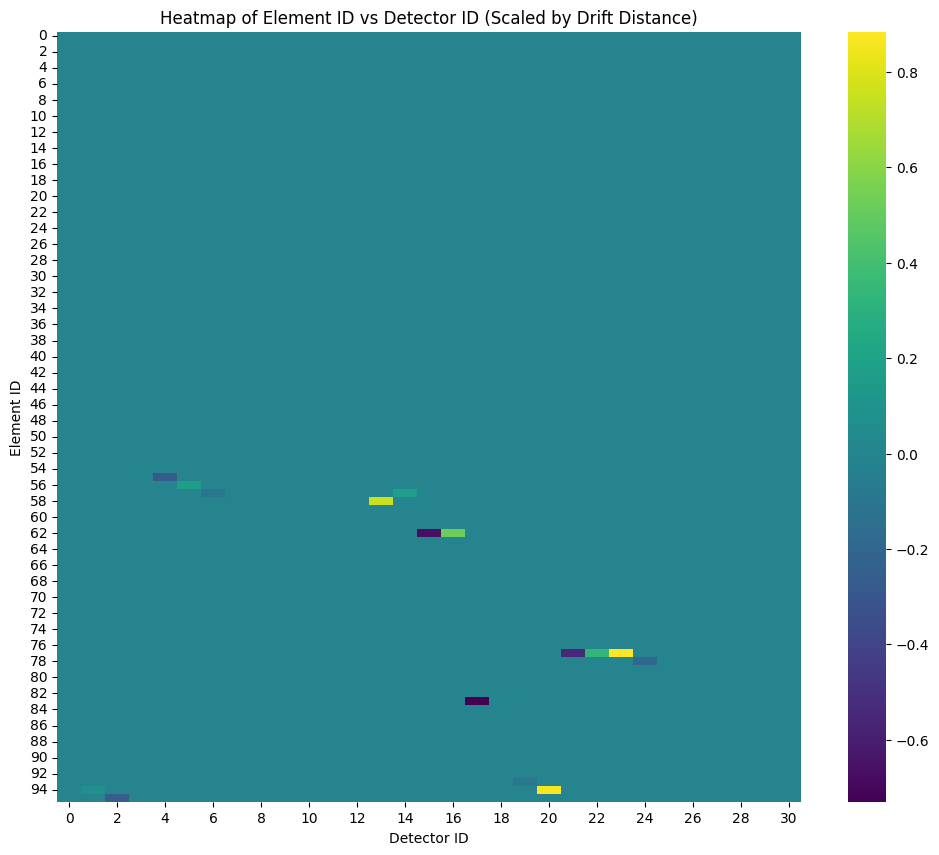

In [184]:
import seaborn as sns

# Initialize the matrix to store aggregated drift distances
max_detector_id = int(hit_matrix[0, 0, :].max()) + 1
max_element_id = int(hit_matrix[0, 1, :].max()) + 1

# Create a matrix to store the sum of drift distances
drift_distance_agg = np.zeros((max_element_id, max_detector_id))

# Aggregate the drift distances
#for i in range(hit_matrix.shape[0]):  # Iterate over each event
i=0
for j in range(hit_matrix.shape[2]):  # Iterate over each element
    det_id = int(hit_matrix[0, 0, j])
    elem_id = int(hit_matrix[i, 1, j])
    drift_dist = hit_matrix[i, 2, j]
    if det_id >= 0 and elem_id >= 0:  # Ensure valid indices
        drift_distance_agg[elem_id, det_id] += drift_dist

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(drift_distance_agg, cmap='viridis', cbar=True)
plt.title('Heatmap of Element ID vs Detector ID (Scaled by Drift Distance)')
plt.xlabel('Detector ID')
plt.ylabel('Element ID')
plt.xlim(0,31)
plt.show()

(0.0, 200.0)

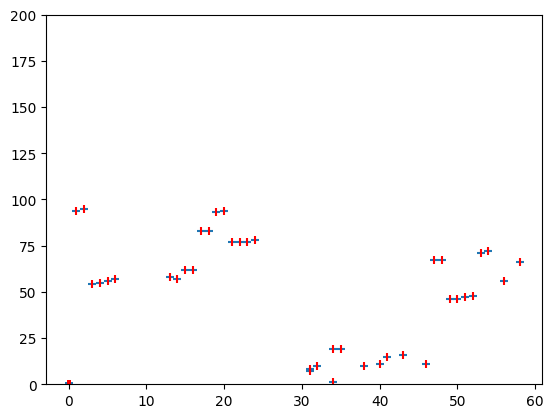

In [186]:
plt.scatter(hit_matrix[0][0],hit_matrix[0][1],marker='_')
plt.scatter(detID[0],elemID[0],marker='|',c='r')

#plt.xlim(30,40)
plt.ylim(0,200)

In [147]:
print(drift_distance)

[ 0.06828712 -0.26184931  0.00516505 -0.27714351  0.16321126 -0.09597948
  0.75677937  0.17388608 -0.67252368  0.52472323 -0.7299571   0.02624936
 -0.07448319  0.86959535 -0.54999137  0.32405281  0.88439471 -0.20569915
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [60]:
Sraw_tree = uproot.open('/home/jay/Desktop/Analysis/ReconstructionAnalysis/run_006096/run_006096_spill_001934514_sraw.root:save')

In [61]:
Sraw_tree.keys()


['rawEvent',
 'rawEvent/PHObject',
 'rawEvent/PHObject/TObject',
 'rawEvent/PHObject/TObject/fUniqueID',
 'rawEvent/PHObject/TObject/fBits',
 'rawEvent/fRunID',
 'rawEvent/fEventID',
 'rawEvent/fSpillID',
 'rawEvent/fTriggerBits',
 'rawEvent/fTargetPos',
 'rawEvent/fTurnID',
 'rawEvent/fRFID',
 'rawEvent/fIntensity[33]',
 'rawEvent/fTriggerEmu',
 'rawEvent/fNRoads[4]',
 'rawEvent/fNHits[63]',
 'rawEvent/fAllHits',
 'rawEvent/fAllHits/fAllHits.fUniqueID',
 'rawEvent/fAllHits/fAllHits.fBits',
 'rawEvent/fAllHits/fAllHits.index',
 'rawEvent/fAllHits/fAllHits.detectorID',
 'rawEvent/fAllHits/fAllHits.elementID',
 'rawEvent/fAllHits/fAllHits.tdcTime',
 'rawEvent/fAllHits/fAllHits.driftDistance',
 'rawEvent/fAllHits/fAllHits.pos',
 'rawEvent/fAllHits/fAllHits.flag',
 'rawEvent/fTriggerHits',
 'rawEvent/fTriggerHits/fTriggerHits.fUniqueID',
 'rawEvent/fTriggerHits/fTriggerHits.fBits',
 'rawEvent/fTriggerHits/fTriggerHits.index',
 'rawEvent/fTriggerHits/fTriggerHits.detectorID',
 'rawEvent/fTr

In [65]:
sraw_drift = Sraw_tree["fAllHits.driftDistance"].arrays(library="np")["fAllHits.driftDistance"]
sraw_detID = Sraw_tree["fAllHits.detectorID"].arrays(library="np")["fAllHits.detectorID"]
sraw_elemID = Sraw_tree["fAllHits.elementID"].arrays(library="np")["fAllHits.elementID"]

In [66]:
print(sraw_elemID[500])

[ 49  49  89  90 108 117 118 127 131 132 158 171 174 177 186 187  49  87
  90  91 108 117 118 128 133 142 153 158 161 175 177 178 187  33  34  49
  50  69  74  74  74  74  83  90 108 110 122 131 135 139 141 146 146 148
 154 154 159  33  33  39  69  82  89 106 108 109 120 121 130 130 131 139
 141 145 153 156 159 159  61  62  62  90 110 110 125 128 147 153 158 158
 159 160 161 162 172  12  29  32  49  50  84  85  86  87  88  89  94  94
  94  95 107 109  11  21  22  23  28  30  31  32  86  88  94  94 107 109
 109  23  36  37  80  86  99 101 101 101 101 102 109  22  80  84  87  87
  96 101 101 102  34  83  84  85  86  90  92  92  95  95  97 110 112 112
  37  90  92  95  96  97 110 112   3   4  82 104 107 108 131  83  83 105
 108 108 108 116 132 132 132  53  81  81 106 109 109  53  54  82  82 107
 109 109 110  10  70  71  72  90  91  92  92  93  93  94  94  95  95  96
 123 124 124 126  10  70  96 123 125 127 123 124 123 123 126 106 108 108
 108 108 132 108 131   4  11  13  18  19  22  22  2